In [59]:
from __future__ import print_function
import numpy as np
from numpy import dot
from numpy.linalg import inv
from numpy.linalg import multi_dot as mdot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sb
#from sklearn.model_selection import train_test_split
import pandas as pd

In [60]:
def prepend_one(X):
    """prepend a one vector to X."""
    return np.column_stack([np.ones(X.shape[0]), X])


In [61]:
def grid2d(start, end, num=50):
    """Create an 2D array where each row is a 2D coordinate.
    np.meshgrid is pretty annoying!
    """
    dom = np.linspace(start, end, num)
    print(dom.shape)
    X0, X1 = np.meshgrid(dom, dom)
#     print(X0.shape)
#     print(X1)
    return np.column_stack([X0.flatten(), X1.flatten()])

In [62]:
# load the data
#data = np.loadtxt("https://ipvs.informatik.uni-stuttgart.de/mlr/marc/teaching/data/dataLinReg2D.txt")
data =np.loadtxt("https://ipvs.informatik.uni-stuttgart.de/mlr/marc/teaching/data/dataQuadReg2D_noisy.txt")
print("data.shape:", data.shape)

data.shape: (50, 3)


In [63]:
X, y = data[:, :2], data[:, 2]

print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (50, 2)
y.shape: (50,)


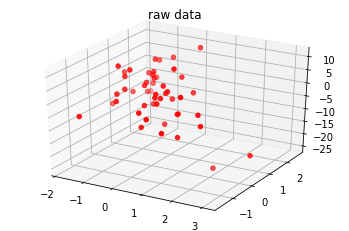

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # the projection arg is important!
ax.scatter(X[:, 0], X[:, 1], y, color="red")
ax.set_title("raw data")
plt.draw()

In [65]:
X = prepend_one(X)


X=np.append(X,np.multiply(X[:,1],X[:,2]).reshape(50,1),axis=1)
X=np.append(X,np.multiply(X[:,1],X[:,1]).reshape(50,1),axis=1)
X=np.append(X,np.multiply(X[:,2],X[:,2]).reshape(50,1),axis=1)


print("X.shape:", X.shape)

X.shape: (50, 6)


In [66]:
beta_ = mdot([inv(dot(X.T, X)), X.T, y])
print("Optimal beta:", beta_)

Optimal beta: [ 1.08677478 -0.93051595  1.12513604  0.99722036 -2.22807929 -0.13205024]


In [67]:
X_grid = prepend_one(grid2d(-3, 3, num=30))#testset data
#X_grid

(30,)


In [68]:
#grid2d(-3, 3, num=30)
X_grid=np.append(X_grid,np.multiply(X_grid[:,1],X_grid[:,2]).reshape(900,1),axis=1)
X_grid=np.append(X_grid,np.multiply(X_grid[:,1],X_grid[:,1]).reshape(900,1),axis=1)
X_grid=np.append(X_grid,np.multiply(X_grid[:,2],X_grid[:,2]).reshape(900,1),axis=1)
print("X_grid.shape:", X_grid.shape)

X_grid.shape: (900, 6)


In [69]:
y_grid = dot(X_grid, beta_)
print("Y_grid.shape", y_grid.shape)

Y_grid.shape (900,)


Lambda=  0.0001
(6, 6)
Optimal beta ridge: [ 1.08677276 -0.9305153   1.12513174  0.9972169  -2.22807779 -0.13204975]
Y_grid.shape (900,)
squared_error=  1402.8905882139645


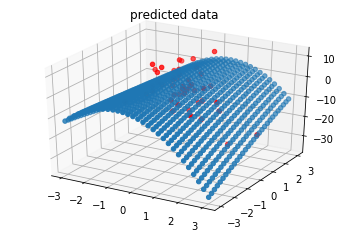

Lambda=  0.001
(6, 6)
Optimal beta ridge: [ 1.08675465 -0.93050951  1.12509304  0.99718579 -2.22806429 -0.13204534]
Y_grid.shape (900,)
squared_error=  1402.890588335637


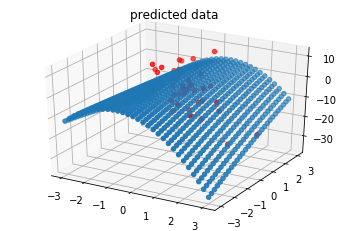

Lambda=  0.01
(6, 6)
Optimal beta ridge: [ 1.08657348 -0.93045153  1.12470628  0.99687474 -2.22792931 -0.13200124]
Y_grid.shape (900,)
squared_error=  1402.8906004969035


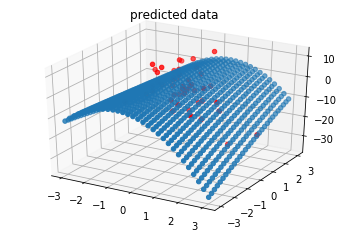

Lambda=  0.1
(6, 6)
Optimal beta ridge: [ 1.08476346 -0.92987113  1.12085432  0.99377495 -2.22658033 -0.13156213]
Y_grid.shape (900,)
squared_error=  1402.891810663169


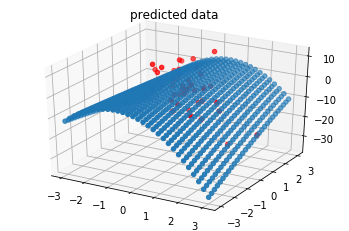

Lambda=  1.0
(6, 6)
Optimal beta ridge: [ 1.06682319 -0.92400845  1.08383657  0.96381076 -2.21316555 -0.12735182]
Y_grid.shape (900,)
squared_error=  1403.0071685324028


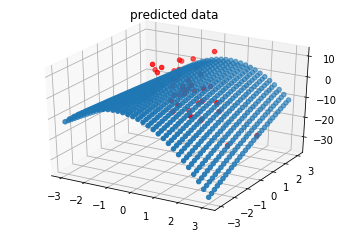

Lambda=  10.0
(6, 6)
Optimal beta ridge: [ 0.90128269 -0.86449716  0.81972642  0.74088193 -2.08597813 -0.09731279]
Y_grid.shape (900,)
squared_error=  1410.8620102091218


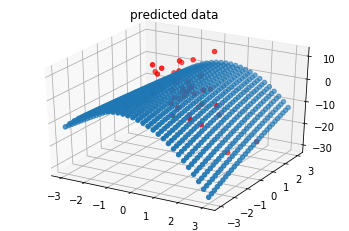

Lambda=  100.0
(6, 6)
Optimal beta ridge: [-0.03339043 -0.52000181  0.26324297  0.22255461 -1.30258569 -0.02248703]
Y_grid.shape (900,)
squared_error=  1584.9665167561027


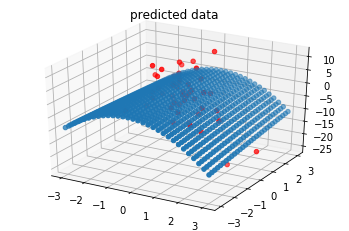

Lambda=  1000.0
(6, 6)
Optimal beta ridge: [-1.17120064 -0.10747887  0.03970987  0.02579076 -0.27035268  0.00212641]
Y_grid.shape (900,)
squared_error=  2088.4970268754664


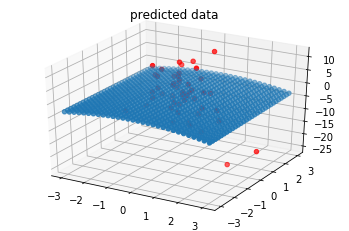

Lambda=  10000.0
(6, 6)
Optimal beta ridge: [-1.42500018e+00 -1.20629637e-02  4.28146163e-03  2.55479473e-03
 -3.02774935e-02  4.07644468e-04]
Y_grid.shape (900,)
squared_error=  2251.983197031453


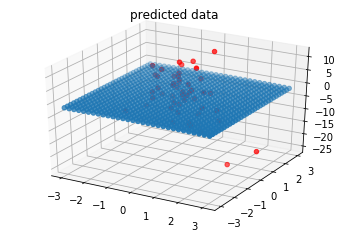

Lambda=  100000.0
(6, 6)
Optimal beta ridge: [-1.45352097e+00 -1.22128982e-03  4.31726763e-04  2.55001211e-04
 -3.06448506e-03  4.32039686e-05]
Y_grid.shape (900,)
squared_error=  2271.645397861523


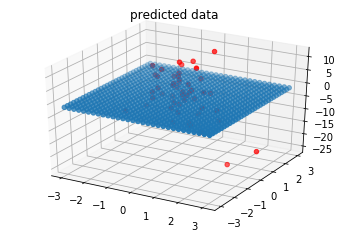

Lambda=  1000000.0
(6, 6)
Optimal beta ridge: [-1.45640835e+00 -1.22281023e-04  4.32090391e-05  2.54950494e-05
 -3.06820758e-04  4.34538064e-06]
Y_grid.shape (900,)
squared_error=  2273.6507986402576


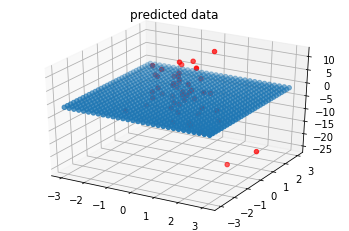

Lambda=  10000000.0
(6, 6)
Optimal beta ridge: [-1.45669744e+00 -1.22296249e-05  4.32126810e-06  2.54945393e-06
 -3.06858033e-05  4.34788502e-07]
Y_grid.shape (900,)
squared_error=  2273.8517376061554


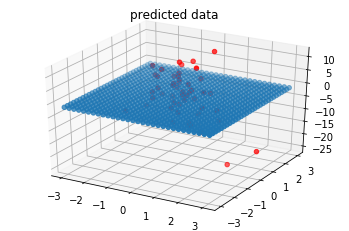

In [70]:
##Ridge reg.
lamb=0.0001
#for lamb in range(0,10000,100):
while lamb <=10000000:
    print("Lambda= ",lamb)
    error=0
    I=np.eye(X.shape[1])
    print(I.shape)
    I[0,0]=0 # beta_1 i.e. intercept is not regularised
    beta_ridge = mdot([inv(dot(X.T, X)+lamb*I), X.T, y])
    print("Optimal beta ridge:", beta_ridge)
    #error=(y-dot(X,beta_ridge))
    for i in range(X.shape[0]):
            error+=(y[i]-dot(X[i].T,beta_ridge))**2
    y_grid = dot(X_grid, beta_ridge)
    print("Y_grid.shape", y_grid.shape)
    squared_error=error   #dot(error,error)+lamb*dot(beta_ridge,beta_ridge)
    print("squared_error= ",squared_error)
    lamb=lamb*10
    # vis the result
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') # the projection part is important
    ax.scatter(X_grid[:, 1], X_grid[:, 2], y_grid) # dont use the 1 infront
    ax.scatter(X[:, 1], X[:, 2], y, color="red") # also show the real data
    ax.set_title("predicted data")
    plt.show()

In [71]:
def get_beta(X,y,lamb):
    I=np.eye(X.shape[1])

    
    beta=mdot([inv(dot(X.T, X)+lamb*I), X.T, y])
    #print("Beta=",beta)
    return beta
    #for i in range(k):
        #beta.append(mdot([inv(dot(d[i].T, d[i])+lamb*I), d[i].T, c[i]]))
        

Lambda= 0
MSE= 40.613058388609105
Lambda=  0.001
MSE= 42.590937882772735
Lambda=  0.01
MSE= 35.145712624023936
Lambda=  0.1
MSE= 41.167428527274645
Lambda=  1.0
MSE= 37.351820493013285
Lambda=  10.0
MSE= 34.071390130432164
Lambda=  100.0
MSE= 34.85893737614114
Lambda=  1000.0
MSE= 43.3058341146987
Lambda=  10000.0
MSE= 45.0092074700092
Lambda=  100000.0
MSE= 49.683300081181706
Lambda=  1000000.0
MSE= 43.22733501593568
Lambda=  10000000.0
MSE= 48.858472398638675
Lambda=  100000000.0
MSE= 48.6365802922639
[40.613058388609105, 42.590937882772735, 35.145712624023936, 41.167428527274645, 37.351820493013285, 34.071390130432164, 34.85893737614114, 43.3058341146987, 45.0092074700092, 49.683300081181706, 43.22733501593568, 48.858472398638675, 48.6365802922639]
[0, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0]
############# K-Fold Cross Validation / Generalization Error plot ############################


Text(0, 0.5, 'MSE')

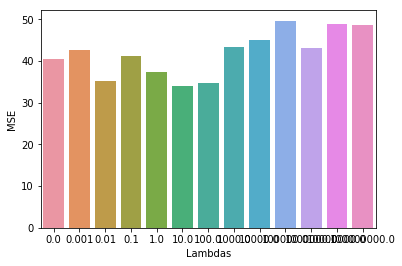

In [81]:

#from sklearn.model_selection import LeaveOneOut k fold CV
label=['Lambdas','MSE','Training_Squared_Error']
def compute_mse_cv(k,lamb):
    loss=0

    from sklearn.model_selection import KFold
    kf=KFold(n_splits=k,shuffle=True)
    for train_index, test_index in kf.split(X):
        error=0
        beta_sqr=0
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]

        y_train, y_test = y[train_index], y[test_index]

        beta_ridge=get_beta(X_train,y_train,lamb=lamb)
        
        for i in range(X_test.shape[0]):
            error+=(y_test[i]-dot(X_test[i].T,beta_ridge))**2
        
        for j in range(1,len(beta_ridge)):
            
            beta_sqr+=beta_ridge[j]**2

        squared_error=(error)/X_test.shape[0]#
        #squared_error=(error)+lamb*beta_sqr)/X_test.shape[0]
        loss+=squared_error
    
    print("MSE=",loss/k)
    return loss/k
  

mse=list()
lambdas=list()
lamb=0.001
print("Lambda= 0",)#lambda=0
mse.append(compute_mse_cv(20,0))
lambdas.append(0)
while lamb <= 100000000:
    print("Lambda= ",lamb)
    lambdas.append(lamb)#np.log(lamb))
    mse.append(compute_mse_cv(20,lamb))
    lamb=lamb*10
print(mse)
print(lambdas)
print("############# K-Fold Cross Validation / Generalization Error plot ############################")
bp=sb.barplot(lambdas,mse)
bp.set_xlabel(label[0])
bp.set_ylabel(label[1])


In [73]:
pd.DataFrame(list(zip(lambdas,mse)),columns=['lambdas','MSE'])

,lambdas,MSE
0,0.000000e+00,39.466980
1,1.000000e-03,39.752003
2,1.000000e-02,38.692838
3,1.000000e-01,39.878615
4,1.000000e+00,41.050015
5,1.000000e+01,39.985005
6,1.000000e+02,40.721739
7,1.000000e+03,47.888685
8,1.000000e+04,43.933958
9,1.000000e+05,47.058417


Lambda= 0
MSE= 45.07376276738667
Lambda=  10
MSE= 34.54796983910195
Lambda=  20
MSE= 32.86927929509506
Lambda=  30
MSE= 35.548327491901645
Lambda=  40
MSE= 36.2170740670897
Lambda=  50
MSE= 34.45145303965306
Lambda=  60
MSE= 35.55636482953215
Lambda=  70
MSE= 34.4027581368624
Lambda=  80
MSE= 36.808287650969106
Lambda=  90
MSE= 38.95949140530895
Lambda=  100
MSE= 39.42208426421307
[45.07376276738667, 34.54796983910195, 32.86927929509506, 35.548327491901645, 36.2170740670897, 34.45145303965306, 35.55636482953215, 34.4027581368624, 36.808287650969106, 38.95949140530895, 39.42208426421307]
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
############# K-Fold Cross Validation / Generalization Error plot ############################


Text(0, 0.5, 'MSE')

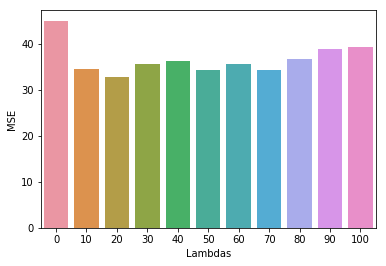

In [79]:
mse=list()
lambdas=list()
#lamb=0.001
lamb=10
print("Lambda= 0",)#lambda=0
mse.append(compute_mse_cv(20,0))
lambdas.append(0)
while lamb <= 100:#000000:
    print("Lambda= ",lamb)
    lambdas.append(lamb)#np.log(lamb))
    mse.append(compute_mse_cv(20,lamb))
    lamb=lamb+10
print(mse)
print(lambdas)
print("############# K-Fold Cross Validation / Generalization Error plot ############################")
bp=sb.barplot(lambdas,mse)
bp.set_xlabel(label[0])
bp.set_ylabel(label[1])

In [80]:
pd.DataFrame(list(zip(lambdas,mse)),columns=['lambdas','MSE'])

,lambdas,MSE
0,0,45.073763
1,10,34.547970
2,20,32.869279
3,30,35.548327
4,40,36.217074
5,50,34.451453
6,60,35.556365
7,70,34.402758
8,80,36.808288
9,90,38.959491


Lambda=  0
Optimal beta ridge: [ 1.08677478 -0.93051595  1.12513604  0.99722036 -2.22807929 -0.13205024]
squared_error=  1402.890588212736


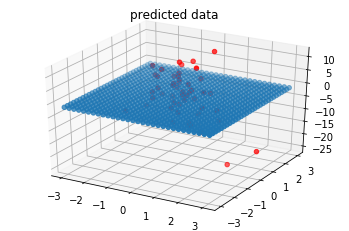

Lambda=  0.001
Lambda=  0.001
Optimal beta ridge: [ 1.08675465 -0.93050951  1.12509304  0.99718579 -2.22806429 -0.13204534]
squared_error=  1402.890588335637


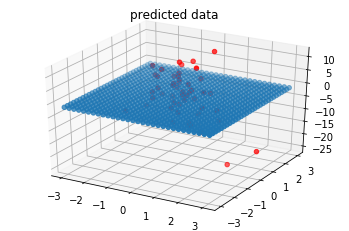

Lambda=  0.01
Lambda=  0.01
Optimal beta ridge: [ 1.08657348 -0.93045153  1.12470628  0.99687474 -2.22792931 -0.13200124]
squared_error=  1402.8906004969035


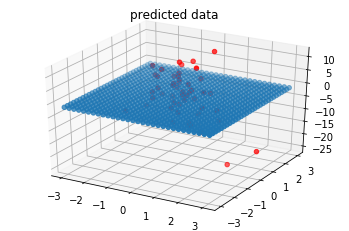

Lambda=  0.1
Lambda=  0.1
Optimal beta ridge: [ 1.08476346 -0.92987113  1.12085432  0.99377495 -2.22658033 -0.13156213]
squared_error=  1402.891810663169


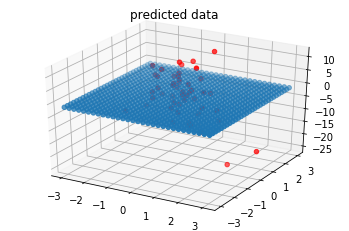

Lambda=  1.0
Lambda=  1.0
Optimal beta ridge: [ 1.06682319 -0.92400845  1.08383657  0.96381076 -2.21316555 -0.12735182]
squared_error=  1403.0071685324028


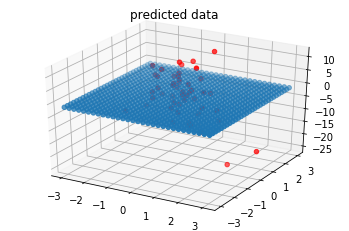

Lambda=  10.0
Lambda=  10.0
Optimal beta ridge: [ 0.90128269 -0.86449716  0.81972642  0.74088193 -2.08597813 -0.09731279]
squared_error=  1410.8620102091218


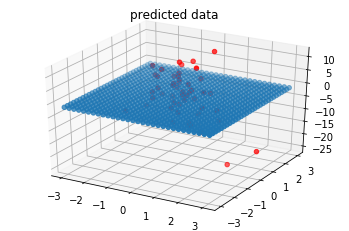

Lambda=  100.0
Lambda=  100.0
Optimal beta ridge: [-0.03339043 -0.52000181  0.26324297  0.22255461 -1.30258569 -0.02248703]
squared_error=  1584.9665167561027


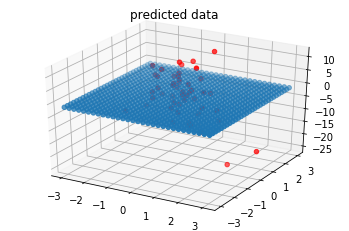

Lambda=  1000.0
Lambda=  1000.0
Optimal beta ridge: [-1.17120064 -0.10747887  0.03970987  0.02579076 -0.27035268  0.00212641]
squared_error=  2088.4970268754664


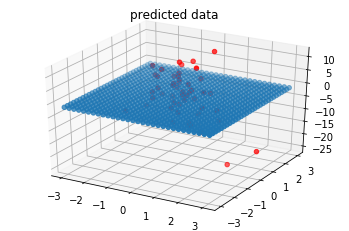

Lambda=  10000.0
Lambda=  10000.0
Optimal beta ridge: [-1.42500018e+00 -1.20629637e-02  4.28146163e-03  2.55479473e-03
 -3.02774935e-02  4.07644468e-04]
squared_error=  2251.983197031453


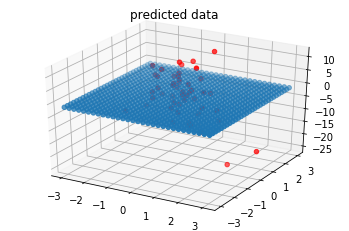

Lambda=  100000.0
Lambda=  100000.0
Optimal beta ridge: [-1.45352097e+00 -1.22128982e-03  4.31726763e-04  2.55001211e-04
 -3.06448506e-03  4.32039686e-05]
squared_error=  2271.645397861523


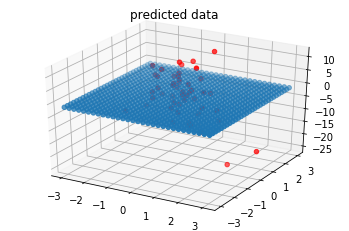

Lambda=  1000000.0
Lambda=  1000000.0
Optimal beta ridge: [-1.45640835e+00 -1.22281023e-04  4.32090391e-05  2.54950494e-05
 -3.06820758e-04  4.34538064e-06]
squared_error=  2273.6507986402576


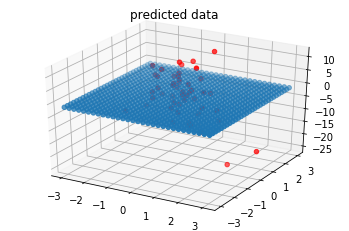

Lambda=  10000000.0
Lambda=  10000000.0
Optimal beta ridge: [-1.45669744e+00 -1.22296249e-05  4.32126810e-06  2.54945393e-06
 -3.06858033e-05  4.34788502e-07]
squared_error=  2273.8517376061554


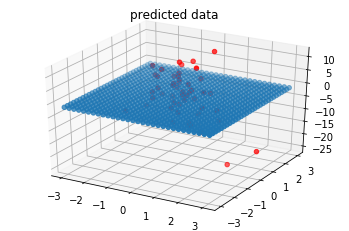

In [74]:
# training error
lambdas=list()
se=list()

def get_training_error(lamb):
    error=0
    beta_sqr=0
    print("Lambda= ",lamb)
    I=np.eye(X.shape[1])
    I[0,0]=0 # beta_1 i.e. intercept is not regularised
    beta_ridge = mdot([inv(dot(X.T, X)+lamb*I), X.T, y])
    print("Optimal beta ridge:", beta_ridge)

    for i in range(X.shape[0]):
        error+=(y[i]-dot(X[i].T,beta_ridge))**2
    for j in range(1,len(beta_ridge)):
        
        beta_sqr+=beta_ridge[j]**2
        
    squared_error=error  #+lamb*beta_sqr
    
    print("squared_error= ",squared_error)
    # vis the result
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') # the projection part is important
    ax.scatter(X_grid[:, 1], X_grid[:, 2], y_grid) # dont use the 1 infront
    ax.scatter(X[:, 1], X[:, 2], y, color="red") # also show the real data
    ax.set_title("predicted data")
    plt.show()
    return squared_error


lambdas.append(0)
se.append(get_training_error(0))
lamb=0.001
while lamb <= 10000000:
    print("Lambda= ",lamb)
    lambdas.append(lamb)#np.log(lamb))
    se.append(get_training_error(lamb))
    lamb=lamb*10







############# Training data Error plot ############################


Text(0, 0.5, 'Training_Squared_Error')

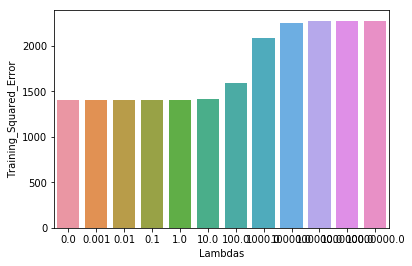

In [75]:

print("############# Training data Error plot ############################")
bp=sb.barplot(lambdas,se)
bp.set_xlabel(label[0])
bp.set_ylabel(label[2])


In [76]:
pd.DataFrame(list(zip(lambdas,se)),columns=['lambdas','Sqaured Errors'])

,lambdas,Sqaured Errors
0,0.000000e+00,1402.890588
1,1.000000e-03,1402.890588
2,1.000000e-02,1402.890600
3,1.000000e-01,1402.891811
4,1.000000e+00,1403.007169
5,1.000000e+01,1410.862010
6,1.000000e+02,1584.966517
7,1.000000e+03,2088.497027
8,1.000000e+04,2251.983197
9,1.000000e+05,2271.645398
